# Traffic Prediction

This project aims to preict the time of day at which certain junctions are congested based on their historical data from 2015 - 2017

In [1]:
import pandas as pd
import numpy as np

In [2]:
import time
from datetime import datetime

In [3]:
df = pd.read_csv("traffic.csv")
df.head()

,DateTime,Junction,Vehicles,ID
0,2015-11-01 00:00:00,1,15,20151101001
1,2015-11-01 01:00:00,1,13,20151101011
2,2015-11-01 02:00:00,1,10,20151101021
3,2015-11-01 03:00:00,1,7,20151101031
4,2015-11-01 04:00:00,1,9,20151101041


In [4]:
df = df[["ID", "DateTime", "Junction", "Vehicles"]]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48120 entries, 0 to 48119
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ID        48120 non-null  int64 
 1   DateTime  48120 non-null  object
 2   Junction  48120 non-null  int64 
 3   Vehicles  48120 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [6]:
df["DateTime"].dtype

dtype('O')

In [7]:
type(df["DateTime"])

pandas.core.series.Series

In [8]:
df["DateTime"] = df["DateTime"].astype("datetime64")

In [8]:
# df["DateTime"] = pd.to_datetime(df["DateTime"])

In [9]:
df["DateTime"].dtype

dtype('<M8[ns]')

In [10]:
df[["Junction", "Vehicles"]] = df[["Junction", "Vehicles"]].astype("int32")

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48120 entries, 0 to 48119
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   ID        48120 non-null  int64         
 1   DateTime  48120 non-null  datetime64[ns]
 2   Junction  48120 non-null  int32         
 3   Vehicles  48120 non-null  int32         
dtypes: datetime64[ns](1), int32(2), int64(1)
memory usage: 1.1 MB


In [12]:
df.describe()

,ID,Junction,Vehicles
count,4.812000e+04,48120.000000,48120.000000
mean,2.016330e+10,2.180549,22.791334
std,5.944854e+06,0.966955,20.750063
min,2.015110e+10,1.000000,1.000000
25%,2.016042e+10,1.000000,9.000000
50%,2.016093e+10,2.000000,15.000000
75%,2.017023e+10,3.000000,29.000000
max,2.017063e+10,4.000000,180.000000


In [13]:
df.duplicated().sum()

0

In [14]:
df.ID.duplicated().sum()

0

In [15]:
df['Junction'].unique()

array([1, 2, 3, 4])

In [16]:
df.Junction.value_counts()

3    14592
2    14592
1    14592
4     4344
Name: Junction, dtype: int64

In [17]:
df.Vehicles.max()

180

In [18]:
df[df['Vehicles'] == df.Vehicles.max()]

,ID,DateTime,Junction,Vehicles
40723,20170223193,2017-02-23 19:00:00,3,180


In [19]:
df[df['Vehicles'] == df.Vehicles.min()]

,ID,DateTime,Junction,Vehicles
16057,20160101012,2016-01-01 01:00:00,2,1
21254,20160804142,2016-08-04 14:00:00,2,1
21255,20160804152,2016-08-04 15:00:00,2,1
21258,20160804182,2016-08-04 18:00:00,2,1
21269,20160805052,2016-08-05 05:00:00,2,1
...,...,...,...,...
47477,20170604054,2017-06-04 05:00:00,4,1
48004,20170626044,2017-06-26 04:00:00,4,1
48028,20170627044,2017-06-27 04:00:00,4,1
48029,20170627054,2017-06-27 05:00:00,4,1


In [20]:
df.DateTime.min()

Timestamp('2015-11-01 00:00:00')

In [21]:
df.DateTime.max()

Timestamp('2017-06-30 23:00:00')

In [22]:
df.DateTime.value_counts().sample(10)

2015-11-16 09:00:00    3
2016-08-08 08:00:00    3
2016-04-01 02:00:00    3
2015-12-29 21:00:00    3
2016-09-19 05:00:00    3
2016-06-07 15:00:00    3
2016-01-21 20:00:00    3
2017-06-18 07:00:00    4
2016-01-15 00:00:00    3
2016-11-14 14:00:00    3
Name: DateTime, dtype: int64

In [27]:
datetime.strptime(str(df.DateTime[0]), "%Y-%m-%d %H:%M:%S").time()

datetime.time(0, 0)

In [28]:
datetime.strptime(str(df.DateTime[0]), "%Y-%m-%d %H:%M:%S").year

2015

In [50]:
datetime.strptime(str(df.DateTime[0]), "%Y-%m-%d %H:%M:%S").day

1

In [25]:
df.DateTime.dt?

Type:        DatetimeProperties
String form: <pandas.core.indexes.accessors.DatetimeProperties object at 0x00000224D3C0E7C8>
File:        c:\users\molie\anaconda3\lib\site-packages\pandas\core\indexes\accessors.py
Docstring:  
Accessor object for datetimelike properties of the Series values.

Examples
--------
>>> s.dt.hour
>>> s.dt.second
>>> s.dt.quarter

Returns a Series indexed like the original Series.
Raises TypeError if the Series does not contain datetimelike values.


In [29]:
df["DateTime"].dt.hour

0         0
1         1
2         2
3         3
4         4
         ..
48115    19
48116    20
48117    21
48118    22
48119    23
Name: DateTime, Length: 48120, dtype: int64

In [24]:
df["DateTime"].dt.time

0        00:00:00
1        01:00:00
2        02:00:00
3        03:00:00
4        04:00:00
           ...   
48115    19:00:00
48116    20:00:00
48117    21:00:00
48118    22:00:00
48119    23:00:00
Name: DateTime, Length: 48120, dtype: object

In [13]:
df["Hour"] = df["DateTime"].dt.strftime("%H:%M")

In [14]:
df["Month"] = df["DateTime"].dt.strftime("%b, %Y")

In [15]:
df = df[["ID", "DateTime", "Month", "Hour", "Junction", "Vehicles"]]

In [81]:
df.head()

,ID,DateTime,Month,Hour,Junction,Vehicles
0,20151101001,2015-11-01 00:00:00,"Nov, 2015",00:00,1,15
1,20151101011,2015-11-01 01:00:00,"Nov, 2015",01:00,1,13
2,20151101021,2015-11-01 02:00:00,"Nov, 2015",02:00,1,10
3,20151101031,2015-11-01 03:00:00,"Nov, 2015",03:00,1,7
4,20151101041,2015-11-01 04:00:00,"Nov, 2015",04:00,1,9


In [16]:
group = df.groupby(["Junction", "Hour"])
group["Vehicles"].sum()

Junction  Hour 
1         00:00    27809
          01:00    23807
          02:00    20616
          03:00    17894
          04:00    15598
                   ...  
4         19:00     1602
          20:00     1636
          21:00     1525
          22:00     1586
          23:00     1504
Name: Vehicles, Length: 96, dtype: int32

In [55]:
print("Total number of vehicles at all junctions over the years:", df.Vehicles.sum())
print("Average number of vehicles at all junctions per day:", df.Vehicles.groupby(df["DateTime"].dt.strftime("%Y-%m-%d")).sum().mean())
print("Average number of vehicles at each junction at a time:", df.Vehicles.mean())
print("Highest number of vehicles at each junction at a time:", df.Vehicles.max())
print("Lowest number of vehicles at each junction at a time:", df.Vehicles.min())

Total number of vehicles at all junctions over the years: 1096719
Average number of vehicles at all junctions per day: 1803.814144736842
Average number of vehicles at each junction at a time: 22.79133416458853
Highest number of vehicles at each junction at a time: 180
Lowest number of vehicles at each junction at a time: 1


In [56]:
df.Vehicles.groupby(df["DateTime"].dt.strftime("%Y-%m-%d")).sum()

DateTime
2015-11-01     596
2015-11-02     909
2015-11-03     911
2015-11-04     818
2015-11-05     770
              ... 
2017-06-26    2956
2017-06-27    3709
2017-06-28    3579
2017-06-29    3575
2017-06-30    3363
Name: Vehicles, Length: 608, dtype: int32

In [39]:
df.Vehicles.groupby(df["Hour"]).sum()

Hour
00:00    47199
01:00    39408
02:00    34291
03:00    29769
04:00    26011
05:00    24408
06:00    26025
07:00    29480
08:00    32888
09:00    38856
10:00    48581
11:00    55128
12:00    56950
13:00    51305
14:00    55544
15:00    55439
16:00    53482
17:00    53430
18:00    56331
19:00    59859
20:00    59799
21:00    56547
22:00    54590
23:00    51399
Name: Vehicles, dtype: int32

In [45]:
df.Vehicles.groupby(df["Junction"]).sum()

Junction
1    657412
2    207983
3    199823
4     31501
Name: Vehicles, dtype: int32

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

In [18]:
# Set plot style and figure size
sns.set(style="whitegrid", rc={"figure.figsize":(15, 8)})

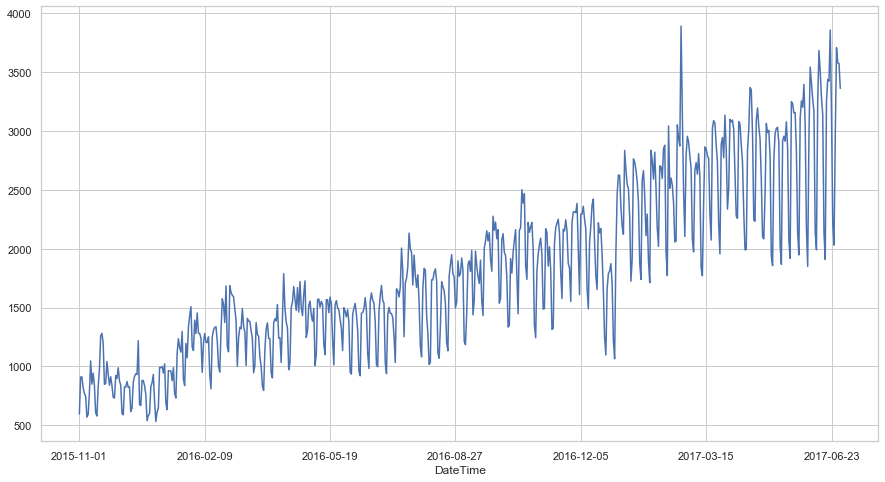

In [19]:
df.Vehicles.groupby(df["DateTime"].dt.strftime("%Y-%m-%d")).sum().plot()

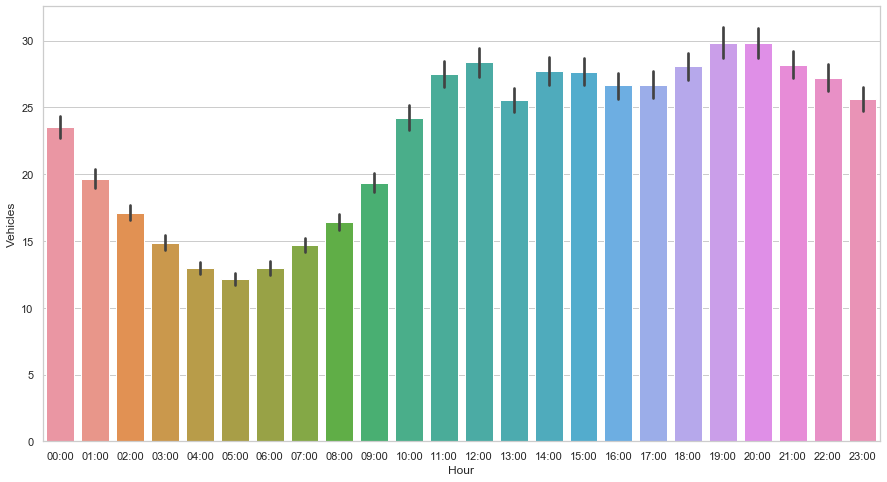

In [20]:
sns.barplot(x="Hour", y="Vehicles", data=df)

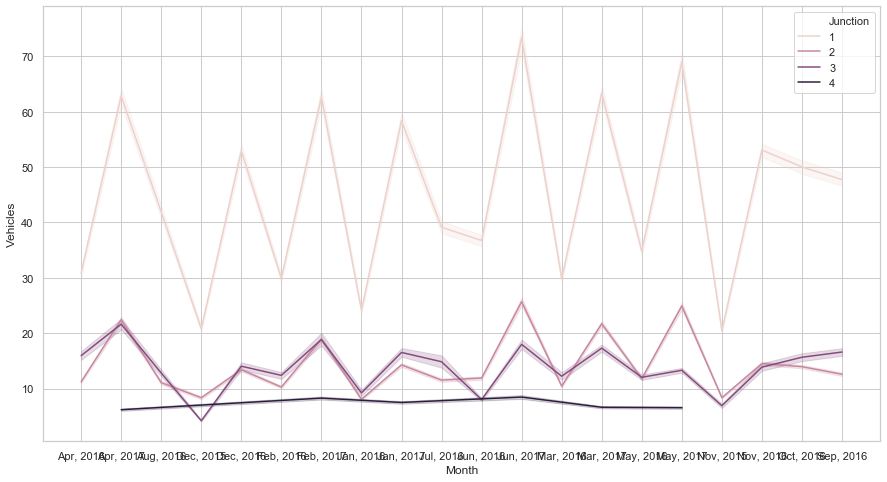

In [22]:
sns.lineplot(x="Month", y="Vehicles", hue="Junction", data=df)

# plt.xlabel(rot)

In [85]:
plt.xticks?

Signature: plt.xticks(ticks=None, labels=None, **kwargs)
Docstring:
Get or set the current tick locations and labels of the x-axis.

Call signatures::

    locs, labels = xticks()            # Get locations and labels
    xticks(ticks, [labels], **kwargs)  # Set locations and labels

Parameters
----------
ticks : array_like
    A list of positions at which ticks should be placed. You can pass an
    empty list to disable xticks.

labels : array_like, optional
    A list of explicit labels to place at the given *locs*.

**kwargs
    :class:`.Text` properties can be used to control the appearance of
    the labels.

Returns
-------
locs
    An array of label locations.
labels
    A list of `.Text` objects.

Notes
-----
Calling this function with no arguments (e.g. ``xticks()``) is the pyplot
equivalent of calling `~.Axes.get_xticks` and `~.Axes.get_xticklabels` on
the current axes.
Calling this function with arguments is the pyplot equivalent of calling
`~.Axes.set_xticks` and `~.Axes.se

In [24]:
df.head()

,ID,DateTime,Month,Hour,Junction,Vehicles
0,20151101001,2015-11-01 00:00:00,"Nov, 2015",00:00,1,15
1,20151101011,2015-11-01 01:00:00,"Nov, 2015",01:00,1,13
2,20151101021,2015-11-01 02:00:00,"Nov, 2015",02:00,1,10
3,20151101031,2015-11-01 03:00:00,"Nov, 2015",03:00,1,7
4,20151101041,2015-11-01 04:00:00,"Nov, 2015",04:00,1,9


In [28]:
# df["Month"] = 
df["DateTime"].dt.strftime("%m")

0        11
1        11
2        11
3        11
4        11
         ..
48115    06
48116    06
48117    06
48118    06
48119    06
Name: DateTime, Length: 48120, dtype: object

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [33]:
model_data = df.copy()

In [37]:
model_data["Month"] = model_data["DateTime"].dt.strftime("%m")
model_data["Year"] = model_data["DateTime"].dt.strftime("%Y")
model_data["Hour"] = model_data["DateTime"].dt.strftime("%H")
model_data.head()

,ID,DateTime,Month,Hour,Junction,Vehicles,Year
0,20151101001,2015-11-01 00:00:00,11,00,1,15,2015
1,20151101011,2015-11-01 01:00:00,11,01,1,13,2015
2,20151101021,2015-11-01 02:00:00,11,02,1,10,2015
3,20151101031,2015-11-01 03:00:00,11,03,1,7,2015
4,20151101041,2015-11-01 04:00:00,11,04,1,9,2015


In [46]:
X = model_data[["DateTime", "Junction", "Hour", "Month", "Year"]]
y = model_data["Vehicles"]

## Feature Selection

In [40]:
X_train, y_train, X_test, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(38496, 2)
(38496,)
(9624, 2)
(9624,)
